In [38]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib
import matplotlib.pyplot as plt

In [39]:
# Load the data
%store -r ts_df_lean

In [40]:
def binning(battery_id, df, bin_edges, param, statistic = 'mean', month = None):
    filter = (df["battery_id"]==battery_id)
    if month != None:
        filter = filter & (df["month"]==month)
    local_df = df.loc[filter]
    output = np.empty(len(bin_edges)-1)
    output[:] = np.NaN
    for i, edge1 in enumerate(bin_edges[:-1]):
        edge2 = bin_edges[i+1]
        bin_filter = df["state_of_charge_percent"].between(edge1, edge2, inclusive = 'left')
        bin_df = local_df.loc[bin_filter]        
        if statistic == 'max':
            calc = bin_df[param].max()
        elif statistic == 'min':
            calc = bin_df[param].min()
        elif statistic == 'mean':
            #In this case get a weighter average.
            sum_of_bin_dts = bin_df["dt_sec"].sum()
            time_weighted_bin_param = bin_df[param] * bin_df["dt_sec"]
            sum_of_time_weighted_bin_param = time_weighted_bin_param.sum()
            if sum_of_bin_dts == 0:
                calc = np.NaN
            else:
                calc = sum_of_time_weighted_bin_param / sum_of_bin_dts
        output[i]=calc
    return(output)

In [41]:
soc_bin_edges = list(range(0,160,10))

Create temperature features

In [42]:
#Columns 0-14 will contain the means values
#Columns 15-29 will contain the means values
#Columns 30-44 will contain the means values
temp_features = np.empty((200,45))
temp_features[:] = np.NaN
for battery in range(200):
    calc = binning(battery, ts_df_lean, soc_bin_edges, param='temperature', statistic = 'mean')
    temp_features[battery,0:15] = calc
    calc = binning(battery, ts_df_lean, soc_bin_edges, param='temperature', statistic = 'max')
    temp_features[battery,15:30] = calc
    calc = binning(battery, ts_df_lean, soc_bin_edges, param='temperature', statistic = 'min')
    temp_features[battery,30:45] = calc

In [43]:
columns = []
for statistic in ['mean', 'max', 'min']:
    for i in range(len(soc_bin_edges)-1):
        bin_edge_left = soc_bin_edges[i]
        bin_edge_right = soc_bin_edges[i+1]
        var_name = '%s-%sSoc_T%s'%(bin_edge_left, bin_edge_right, statistic)
        columns.append(var_name)

In [44]:
df_temp_features = pd.DataFrame(temp_features, columns=columns)

In [45]:
df_temp_features

,0-10Soc_Tmean,10-20Soc_Tmean,20-30Soc_Tmean,30-40Soc_Tmean,40-50Soc_Tmean,50-60Soc_Tmean,60-70Soc_Tmean,70-80Soc_Tmean,80-90Soc_Tmean,90-100Soc_Tmean,...,50-60Soc_Tmin,60-70Soc_Tmin,70-80Soc_Tmin,80-90Soc_Tmin,90-100Soc_Tmin,100-110Soc_Tmin,110-120Soc_Tmin,120-130Soc_Tmin,130-140Soc_Tmin,140-150Soc_Tmin
0,NaN,23.318433,24.062276,24.258555,24.564962,24.910201,25.296642,25.600262,25.806480,26.095623,...,21.297780,21.750973,22.796979,22.888533,22.785534,22.863355,NaN,NaN,NaN,NaN
1,NaN,24.236325,25.194014,25.851643,26.204337,26.442372,26.590690,27.000097,27.570166,27.419506,...,23.492790,23.517967,23.733120,24.655528,22.066835,22.066835,34.282444,NaN,NaN,NaN
2,NaN,23.983684,25.445023,26.234594,26.213206,26.068135,26.311589,26.273019,26.160825,26.399674,...,22.288853,21.947814,20.748455,20.748455,21.071183,22.197299,NaN,NaN,NaN,NaN
3,NaN,25.673549,26.660244,27.848519,28.160162,28.459899,28.969052,29.379906,29.457698,29.106309,...,24.479286,25.266651,25.626001,25.092699,25.042344,25.587091,NaN,NaN,NaN,NaN
4,NaN,25.101141,25.431896,25.675038,26.287188,26.876867,27.332187,27.806684,28.183420,28.582034,...,23.760586,23.836118,24.303044,25.140764,23.925383,24.328222,28.635843,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NaN,23.405195,24.360862,25.163542,25.371960,25.516160,26.168291,26.863842,27.128336,27.191667,...,22.394141,23.440146,23.440146,23.772030,22.888533,22.888533,28.088808,NaN,NaN,NaN
196,NaN,NaN,27.838277,26.803578,26.909304,26.975847,27.124489,27.356350,27.704148,29.634922,...,23.847562,23.987182,23.517967,23.517967,23.746853,24.891279,NaN,NaN,NaN,NaN
197,NaN,22.825063,23.791480,24.712462,25.153908,25.249170,25.498992,25.987446,25.937571,25.538334,...,21.084916,21.391623,22.355230,22.785534,22.094301,22.330053,34.282444,NaN,NaN,NaN
198,NaN,23.795141,25.076109,25.910455,26.003582,26.269146,26.769855,27.617220,28.927625,29.543796,...,22.460517,22.302586,23.657588,24.227512,22.952621,23.286793,34.495308,NaN,NaN,NaN


In [48]:
# Take care of NaN values
means = df_temp_features.mean()
df_temp_features.fillna(means, axis = 0)

,0-10Soc_Tmean,10-20Soc_Tmean,20-30Soc_Tmean,30-40Soc_Tmean,40-50Soc_Tmean,50-60Soc_Tmean,60-70Soc_Tmean,70-80Soc_Tmean,80-90Soc_Tmean,90-100Soc_Tmean,...,50-60Soc_Tmin,60-70Soc_Tmin,70-80Soc_Tmin,80-90Soc_Tmin,90-100Soc_Tmin,100-110Soc_Tmin,110-120Soc_Tmin,120-130Soc_Tmin,130-140Soc_Tmin,140-150Soc_Tmin
0,26.762678,23.318433,24.062276,24.258555,24.564962,24.910201,25.296642,25.600262,25.806480,26.095623,...,21.297780,21.750973,22.796979,22.888533,22.785534,22.863355,32.282299,31.349443,28.042267,22.840467
1,26.762678,24.236325,25.194014,25.851643,26.204337,26.442372,26.590690,27.000097,27.570166,27.419506,...,23.492790,23.517967,23.733120,24.655528,22.066835,22.066835,34.282444,31.349443,28.042267,22.840467
2,26.762678,23.983684,25.445023,26.234594,26.213206,26.068135,26.311589,26.273019,26.160825,26.399674,...,22.288853,21.947814,20.748455,20.748455,21.071183,22.197299,32.282299,31.349443,28.042267,22.840467
3,26.762678,25.673549,26.660244,27.848519,28.160162,28.459899,28.969052,29.379906,29.457698,29.106309,...,24.479286,25.266651,25.626001,25.092699,25.042344,25.587091,32.282299,31.349443,28.042267,22.840467
4,26.762678,25.101141,25.431896,25.675038,26.287188,26.876867,27.332187,27.806684,28.183420,28.582034,...,23.760586,23.836118,24.303044,25.140764,23.925383,24.328222,28.635843,31.349443,28.042267,22.840467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,26.762678,23.405195,24.360862,25.163542,25.371960,25.516160,26.168291,26.863842,27.128336,27.191667,...,22.394141,23.440146,23.440146,23.772030,22.888533,22.888533,28.088808,31.349443,28.042267,22.840467
196,26.762678,24.329773,27.838277,26.803578,26.909304,26.975847,27.124489,27.356350,27.704148,29.634922,...,23.847562,23.987182,23.517967,23.517967,23.746853,24.891279,32.282299,31.349443,28.042267,22.840467
197,26.762678,22.825063,23.791480,24.712462,25.153908,25.249170,25.498992,25.987446,25.937571,25.538334,...,21.084916,21.391623,22.355230,22.785534,22.094301,22.330053,34.282444,31.349443,28.042267,22.840467
198,26.762678,23.795141,25.076109,25.910455,26.003582,26.269146,26.769855,27.617220,28.927625,29.543796,...,22.460517,22.302586,23.657588,24.227512,22.952621,23.286793,34.495308,31.349443,28.042267,22.840467


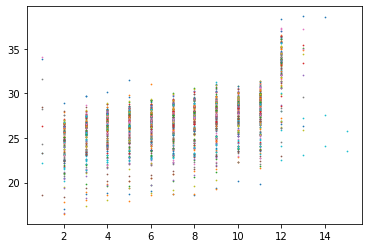

In [15]:
bin_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
xticks = [0-10,10-20,-20-30,]
f, ax = plt.subplots()
s=0.5
for battery in range(200):
    ax.scatter(bin_list, temp_features[battery,0:15], s=s)

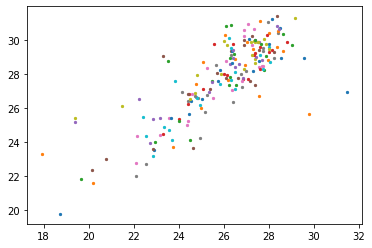

In [16]:
f, ax = plt.subplots()
s=5
for battery in range(200):
    x = temp_features[battery,4]
    y = temp_features[battery,10]
    ax.scatter(x,y, s=s)

In [51]:
temp_features_no_nans

array([[26.76267806, 23.31843305, 24.06227601, ..., 31.3494425 ,
        28.04226749, 22.84046693],
       [26.76267806, 24.23632457, 25.19401378, ..., 31.3494425 ,
        28.04226749, 22.84046693],
       [26.76267806, 23.98368416, 25.44502261, ..., 31.3494425 ,
        28.04226749, 22.84046693],
       ...,
       [26.76267806, 22.82506319, 23.79148   , ..., 31.3494425 ,
        28.04226749, 22.84046693],
       [26.76267806, 23.79514099, 25.07610888, ..., 31.3494425 ,
        28.04226749, 22.84046693],
       [26.76267806, 26.7675445 , 27.40508278, ..., 31.3494425 ,
        28.04226749, 22.84046693]])

PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

temp_features_no_nans_st =  StandardScaler().fit_transform(temp_features_no_nans)
pca_out = PCA().fit(temp_features_no_nans_st)

In [19]:
pca_out.explained_variance_ratio_

array([4.77710615e-01, 1.30435143e-01, 9.83359729e-02, 6.39683273e-02,
       4.48139271e-02, 3.95951809e-02, 2.35318142e-02, 2.05578196e-02,
       1.92613670e-02, 1.19660184e-02, 9.79618453e-03, 8.38413713e-03,
       7.60627026e-03, 6.29706201e-03, 5.67739532e-03, 4.54381108e-03,
       3.93994835e-03, 3.36854470e-03, 2.90640889e-03, 2.57822741e-03,
       1.89073750e-03, 1.75279848e-03, 1.55525601e-03, 1.39556131e-03,
       1.20720914e-03, 1.07907204e-03, 9.63135074e-04, 8.69453031e-04,
       7.31554436e-04, 5.75415174e-04, 4.76877971e-04, 4.33620528e-04,
       4.23830114e-04, 3.15155024e-04, 2.82066398e-04, 2.32194965e-04,
       1.60733689e-04, 1.47437222e-04, 1.19258350e-04, 6.41579742e-05,
       5.03006883e-05, 2.39767890e-33, 2.39767890e-33, 2.39767890e-33,
       2.39767890e-33])

In [20]:
# Cumulative proportion of variance
np.cumsum(pca_out.explained_variance_ratio_)

array([0.47771061, 0.60814576, 0.70648173, 0.77045006, 0.81526398,
       0.85485917, 0.87839098, 0.8989488 , 0.91821017, 0.93017619,
       0.93997237, 0.94835651, 0.95596278, 0.96225984, 0.96793723,
       0.97248105, 0.97642099, 0.97978954, 0.98269595, 0.98527417,
       0.98716491, 0.98891771, 0.99047297, 0.99186853, 0.99307574,
       0.99415481, 0.99511794, 0.9959874 , 0.99671895, 0.99729437,
       0.99777125, 0.99820487, 0.9986287 , 0.99894385, 0.99922592,
       0.99945811, 0.99961885, 0.99976628, 0.99988554, 0.9999497 ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [21]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# From sklearn:
# components_ndarray of shape (n_components, n_features)
# Principal axes in feature space, representing the directions of maximum variance in the data.
# The components are sorted by explained_variance_.
loadings = pca_out.components_
num_pc = pca_out.n_features_

In [22]:
loadings

array([[-5.69615257e-02, -1.88531209e-01, -2.00032447e-01, ...,
        -2.58492854e-02, -2.14719724e-02, -2.07055275e-02],
       [-1.32926397e-01,  8.37245279e-03,  2.20395768e-02, ...,
        -3.46884182e-01, -3.46327395e-01, -1.37610227e-01],
       [ 1.01243634e-01, -5.20506489e-02, -6.49994688e-02, ...,
        -5.07004981e-02, -9.36833488e-02, -2.35299193e-01],
       ...,
       [ 0.00000000e+00,  5.49664608e-16, -6.56025377e-16, ...,
         5.10124275e-15,  1.48520109e-01, -7.88288051e-01],
       [-0.00000000e+00,  6.29276485e-16, -8.88250856e-16, ...,
         6.18601173e-16, -4.31823452e-01, -5.72267739e-02],
       [-0.00000000e+00, -2.36532686e-16,  2.62153502e-16, ...,
         9.75154029e-16, -2.96500500e-01, -2.00458761e-01]])

In [23]:
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45
0,-0.056962,-0.132926,0.101244,0.334456,-0.222520,-0.423848,-0.115923,-0.058529,-0.054372,-0.009997,...,0.078255,0.149547,-0.234564,0.010932,-0.017073,-0.050210,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,-0.188531,0.008372,-0.052051,0.003405,-0.047534,-0.044763,0.229120,0.215687,-0.152787,-0.262794,...,0.191826,-0.331099,-0.128192,0.166976,0.069802,-0.050643,-1.765863e-15,5.496646e-16,6.292765e-16,-2.365327e-16
2,-0.200032,0.022040,-0.064999,-0.019877,-0.044869,-0.024632,0.170326,0.116141,-0.027386,-0.107357,...,-0.162679,0.381734,0.207718,-0.247727,0.010586,0.031430,1.137443e-15,-6.560254e-16,-8.882509e-16,2.621535e-16
3,-0.206695,0.036708,-0.068177,-0.028096,-0.008056,-0.025681,0.074427,0.009576,0.040111,0.049559,...,-0.349766,-0.415729,0.006694,0.200620,-0.022005,-0.001400,1.365094e-15,1.464775e-15,1.969316e-15,-2.823307e-16
4,-0.203625,-0.006706,-0.068628,-0.058006,0.045068,-0.044961,0.039384,0.074902,0.022093,0.173853,...,0.526438,0.197374,-0.207670,-0.027062,-0.011728,0.117422,1.768006e-16,-2.273572e-15,-1.251461e-15,9.312606e-16


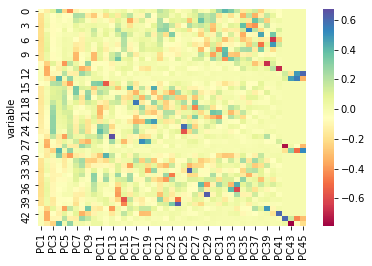

In [24]:
import seaborn as sns
ax = sns.heatmap(loadings_df, annot=False, cmap='Spectral')
ax.set_ylabel('variable')
plt.show()

Text(0, 0.5, 'Proportion of variance (%)')

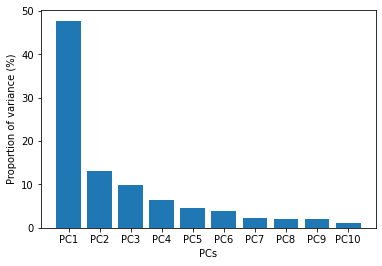

In [25]:
plt.bar(pc_list[:10], height = pca_out.explained_variance_ratio_[:10]*100)
plt.xlabel('PCs')
plt.ylabel('Proportion of variance (%)')

In [26]:
pca_scores = PCA().fit_transform(temp_features_no_nans_st)
pca_scores.shape

(200, 45)

Text(0, 0.5, 'PC2')

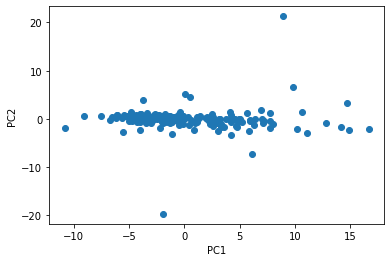

In [28]:
#2D data visualisation
PC1 = pca_scores[:,0]
PC2 = pca_scores[:,1]
plt.scatter(PC1, PC2)
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0.5, 0, 'PC3')

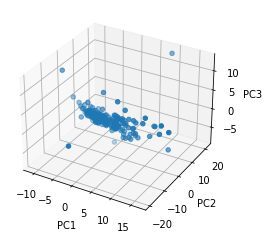

In [29]:
#3D data visualisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = pca_scores[:,0]
ys = pca_scores[:,1]
zs = pca_scores[:,2]
ax.scatter(xs, ys, zs)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')